In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("F:/Python/Data/Wage.csv")

data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


# Simple Linear Regression

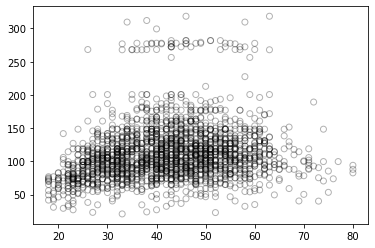

In [75]:
data_x = data['age']
data_y = data['wage']

#Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    data_x, data_y, test_size = 0.3, random_state = 101)

#Visualize the relationship
plt.scatter(train_x, train_y, facecolor = 'None', edgecolor = 'k',
           alpha = 0.3)
plt.show()

In [76]:
from sklearn.linear_model import LinearRegression
%xmode Verbose

#Fitting linear regression model
x = train_x.values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, train_y)
print(model.coef_)
print(model.intercept_)

Exception reporting mode: Verbose
[0.66475439]
83.8492396558326


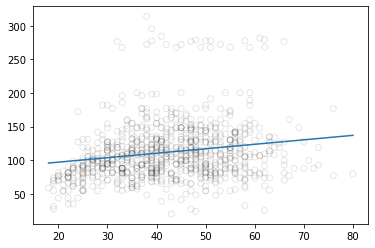

In [77]:
# Prediction on validation dataset
valid_x = valid_x.values.reshape(-1, 1)
pred = model.predict(valid_x)

# Visualization
xp = np.linspace(valid_x.min(), valid_x.max(), 70)
xp = xp.reshape(-1, 1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k',
            alpha = 0.1)
plt.plot(xp, pred_plot)
plt.show()

In [66]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_y, pred))
print(rms)

40.81495194944884


# Polynomial Regression

[ -0.05636873   5.55277853 -14.58771362]


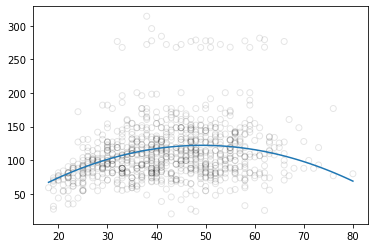

In [84]:
# Generate weights for polynomial function
weights = np.polyfit(train_x, train_y, 2)
print(weights)

# Generate model
model = np.poly1d(weights)

pred = model(valid_x)

xp = np.linspace(valid_x.min(), valid_x.max(), 70)
pred_plot = model(xp)

plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k',
           alpha = 0.1)

plt.plot(xp, pred_plot)
plt.show()